This project includes data collection, EDA, cleaning, feature engineering, model selection, data splitting, model training, hyperparameter tuning, model evaluation, and model improvement through iteration and cross-validation.

**Overview**


*Use Case*: Commonly used for classification and pattern recognition.  

*Components*: 150 samples from three species of Iris flowers (Iris setosa, Iris versicolor, and Iris virginica).  

**Features**  

The dataset contains the following features:  


Sepal Length (in cm)  

Sepal Width (in cm)  

Petal Length (in cm)  

Petal Width (in cm)  

**Classes**  

There are three classes, each representing a different species of Iris:  


Iris setosa  

Iris versicolor  

Iris virginica  

Each class has 50 samples.  


**Data Structure**  

The dataset is structured as follows:  


*Data*: A 2D numpy array of shape (150, 4), where each row represents a sample and each column represents a feature.  

*Target*: A 1D numpy array of shape (150,), containing the class labels (0, 1, 2).  

*Target Names*: An array of shape (3,) containing the names of the target classes.  

*Feature Names*: A list of the feature names.  

*Description*: A detailed description of the dataset.  

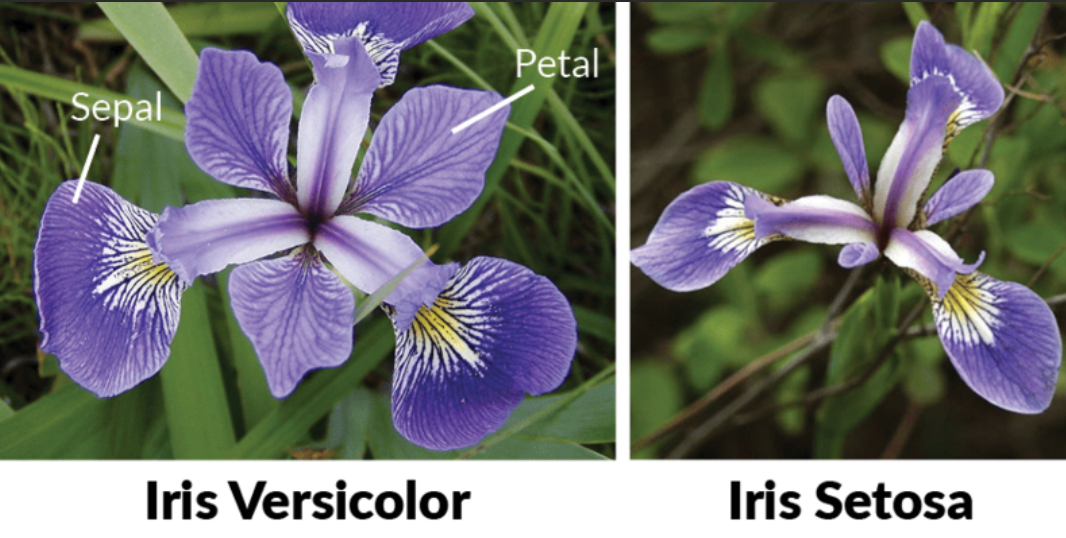

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [31]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
#EDA
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [36]:
df.isnull().sum()
#if any then run
#df.dropna() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [37]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


c:\Users\Aadi Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


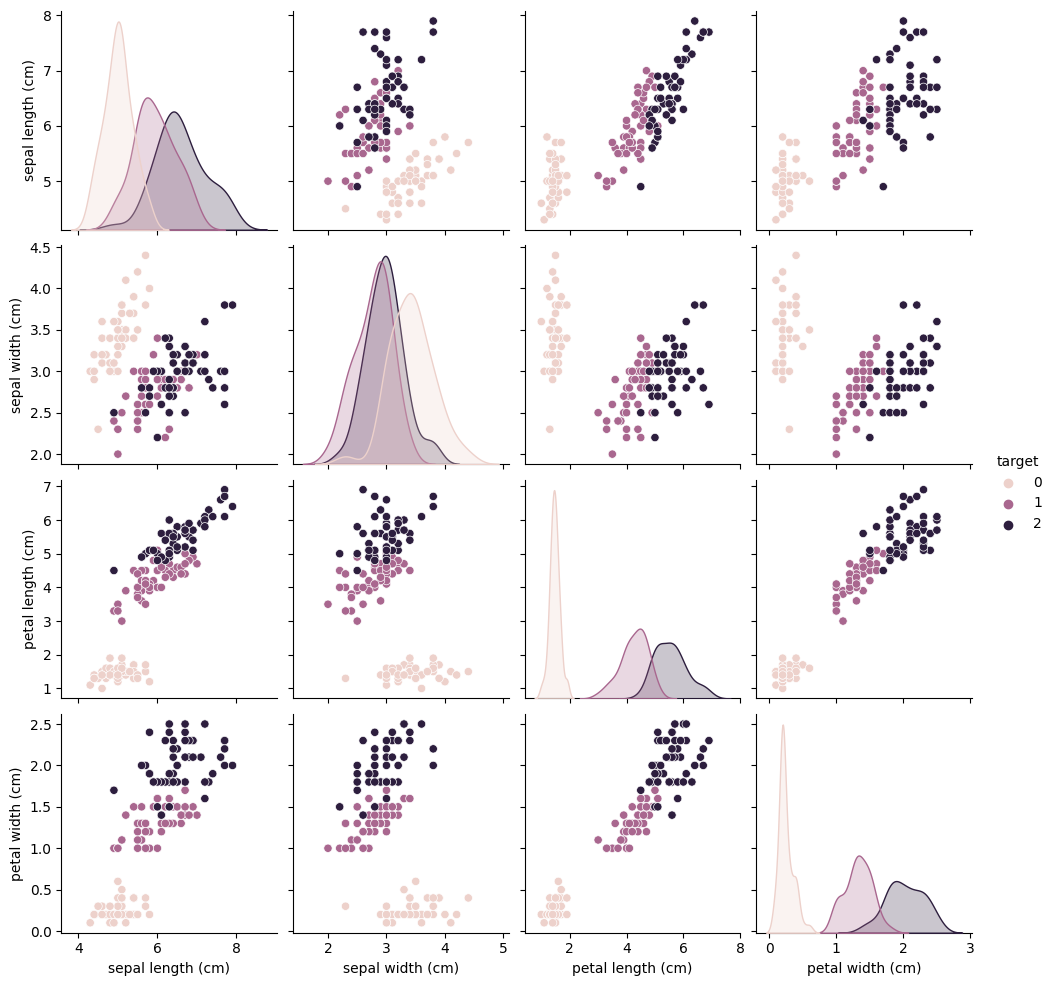

In [38]:
sns.pairplot(df,hue='target')
plt.show()

In [66]:
# Feature Engineering
# For this example, the dataset is already clean and doesn't require much feature engineering
# Standardize the features: scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns='target',axis=1))
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled['target'] = df['target']
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [67]:
# Data Splitting
X = df_scaled.drop(columns='target',axis=1)
Y = df_scaled['target']

In [68]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [69]:
# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [70]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,-0.416010,-1.513160,-0.032966,-0.262387
133,0.553333,-0.592373,0.762758,0.395774
137,0.674501,0.098217,0.990108,0.790671
75,0.916837,-0.131979,0.364896,0.264142
109,1.643844,1.249201,1.331133,1.712096
...,...,...,...,...
71,0.310998,-0.592373,0.137547,0.132510
106,-1.143017,-1.282963,0.421734,0.659038
14,-0.052506,2.169988,-1.453901,-1.315444
92,-0.052506,-1.052767,0.137547,0.000878


In [71]:
Y_train

81     1
133    2
137    2
75     1
109    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 105, dtype: int32

In [72]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142
31,-0.537178,0.788808,-1.283389,-1.052180
64,-0.294842,-0.362176,-0.089803,0.132510
141,1.280340,0.098217,0.762758,1.448832
68,0.432165,-1.973554,0.421734,0.395774
82,-0.052506,-0.822570,0.080709,0.000878


In [73]:
Y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: target, dtype: int32

In [74]:
# Choose Model
model = RandomForestClassifier()

# Model Training
model.fit(X_train,Y_train)

RandomForestClassifier()

In [75]:
# Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [77]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50,100,150],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [4,6,8,10],
    'criterion': ['gini','entropy']
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train,Y_train)

c:\Users\Aadi Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Aadi Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Aadi Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Aadi Bhardwaj\AppData\Local\Programs\Python\Python31

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [79]:
print(f"best param: {grid_search.best_params_}")

best param: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}


In [81]:
# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [82]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [83]:
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")

Accuracy: 1.0


In [85]:
# Improve the Model by Iteration and Cross Validation Score
cross_val_scores = cross_val_score(best_model, X, Y, cv=5)
print(f"Cross Validation Scores: {cross_val_scores}")
print(f"Mean Cross Validation Score: {cross_val_scores.mean()}")

# Further improvement can be done by trying other models, feature selection, or more hyperparameter tuning

Cross Validation Scores: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
Mean Cross Validation Score: 0.9533333333333334
